In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARMA
from scipy.stats.distributions import chi2
import statsmodels.graphics.tsaplots as sgt
from math import sqrt
import seaborn as sns
sns.set()

In [99]:
raw_data = pd.read_csv('013 IndexE8.csv')

In [100]:
data = raw_data.copy()

In [101]:
data.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


In [102]:
data.date = pd.to_datetime(data.date, dayfirst=True)

In [103]:
data.head()

,date,spx,dax,ftse,nikkei
0,1994-01-07,469.90,2224.95,3445.98,18124.01
1,1994-01-10,475.27,2225.00,3440.58,18443.44
2,1994-01-11,474.13,2228.10,3413.77,18485.25
3,1994-01-12,474.17,2182.06,3372.02,18793.88
4,1994-01-13,472.47,2142.37,3360.01,18577.26


In [104]:
data.set_index('date', inplace=True)

In [105]:
data.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


In [106]:
data = data.asfreq('b')

In [107]:
data.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


In [108]:
data.isnull().sum()

spx       8
dax       8
ftse      8
nikkei    8
dtype: int64

In [109]:
data = data.fillna(method='ffill')

In [110]:
data.isnull().sum()

spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

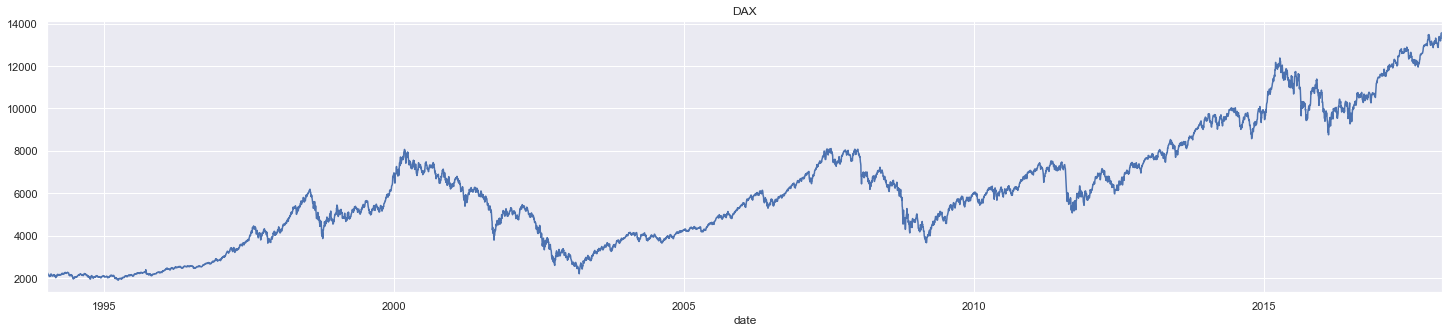

In [111]:
data.dax.plot(figsize=(25,5))
plt.title('DAX')
plt.show()

In [112]:
data_dax = data.copy()

In [113]:
data_dax['market_value'] = data.dax

In [114]:
del data_dax['spx']
del data_dax['dax']
del data_dax['ftse']
del data_dax['nikkei']

In [115]:
#Filtering Warnings
import warnings
warnings.filterwarnings('ignore')

In [116]:
size = int(len(data_dax)*0.8)
train_data, test_data = data_dax[size:], data_dax[:size]

In [117]:
#ADFULLER TEST
sts.adfuller(data_dax.market_value)

(-0.056531101784050734,
 0.9535997428061945,
 5,
 6271,
 {'1%': -3.4313932114153967,
  '5%': -2.8620010072061226,
  '10%': -2.567015391155308},
 73062.30021607758)

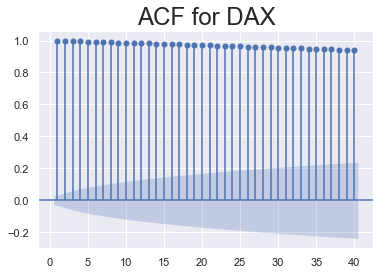

In [118]:
sgt.plot_acf(test_data.market_value, zero=False, lags=40)
plt.title('ACF for DAX', Size=24)
plt.show()

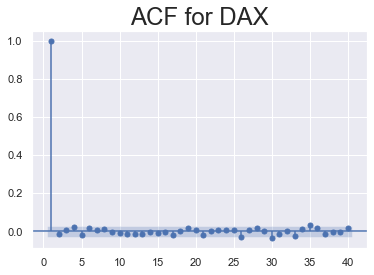

In [119]:
sgt.plot_pacf(test_data.market_value, zero=False, lags=40)
plt.title('ACF for DAX', Size=24)
plt.show()

In [120]:
#Returns of Dax
test_data['returns'] = test_data.market_value.pct_change(1) * 100

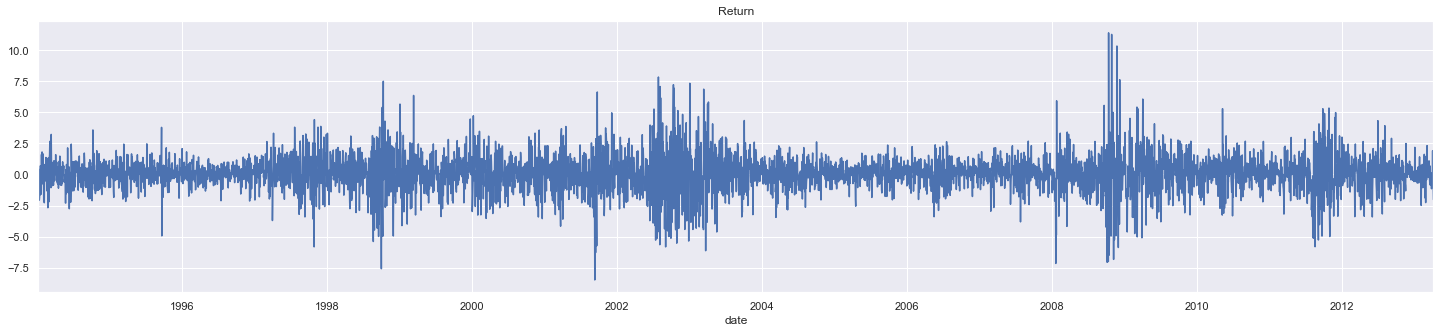

In [121]:
test_data.returns.plot(figsize=(25,5))
plt.title('Return')
plt.show()

In [122]:
#ADFULLER TEST
sts.adfuller(test_data.returns[1:])

(-33.26635240958838,
 0.0,
 4,
 5015,
 {'1%': -3.431654616214729,
  '5%': -2.862116499672828,
  '10%': -2.567076871409699},
 18229.121015170807)

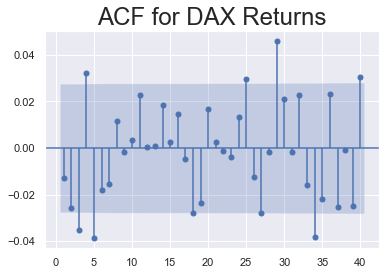

In [123]:
sgt.plot_acf(test_data.returns[1:], zero=False, lags=40)
plt.title('ACF for DAX Returns', Size=24)
plt.show()

### Autoregressive Model AM

In [124]:
model_ma_1 = ARMA(test_data.returns[1:], order=(1,0))
results_ma_1 = model_ma_1.fit()
print(results_ma_1.summary())

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(1, 0)   Log Likelihood               -9174.094
Method:                       css-mle   S.D. of innovations              1.505
Date:                Wed, 17 Mar 2021   AIC                          18354.188
Time:                        21:47:48   BIC                          18373.751
Sample:                    01-10-1994   HQIC                         18361.043
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0359      0.021      1.715      0.086      -0.005       0.077
ar.L1.returns    -0.0130      0.014     -0.919      0.358      -0.041       0.015
                                    Root

In [125]:
model_ma_2 = ARMA(test_data.returns[1:], order=(2,0))
results_ma_2 = model_ma_2.fit()
print(results_ma_2.summary())

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(2, 0)   Log Likelihood               -9172.389
Method:                       css-mle   S.D. of innovations              1.504
Date:                Wed, 17 Mar 2021   AIC                          18352.778
Time:                        21:47:53   BIC                          18378.862
Sample:                    01-10-1994   HQIC                         18361.918
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0360      0.020      1.761      0.078      -0.004       0.076
ar.L1.returns    -0.0133      0.014     -0.943      0.346      -0.041       0.014
ar.L2.returns    -0.0261      0.014     

In [126]:
#LLR Test
def LLR_test(mod_1,mod_2, DF=1):
    #mod_1, mod_2: model we want to compare
    #Degree of Freedom
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = (2*(L2-L1))
    p = chi2.sf(LR,DF).round(2)
    return p

In [79]:
print('LLR_Test : ' + str(LLR_test(model_ma_1,model_ma_2)))

LLR_Test : 0.06


In [80]:
model_ma_3 = ARMA(test_data.returns[1:], order=(3,0))
results_ma_3 = model_ma_3.fit()
print(results_ma_3.summary())
print('\n')
print('LLR_Test : ' + str(LLR_test(model_ma_2,model_ma_3)))

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(3, 0)   Log Likelihood               -9169.109
Method:                       css-mle   S.D. of innovations              1.503
Date:                Wed, 17 Mar 2021   AIC                          18348.217
Time:                        21:31:36   BIC                          18380.823
Sample:                    01-10-1994   HQIC                         18359.643
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0360      0.020      1.827      0.068      -0.003       0.075
ar.L1.returns    -0.0143      0.014     -1.011      0.312      -0.042       0.013
ar.L2.returns    -0.0265      0.014     

In [81]:
model_ma_4 = ARMA(test_data.returns[1:], order=(4,0))
results_ma_4 = model_ma_4.fit()
print(results_ma_4.summary())
print('\n')
print('LLR_Test : ' + str(LLR_test(model_ma_3,model_ma_4)))

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(4, 0)   Log Likelihood               -9166.777
Method:                       css-mle   S.D. of innovations              1.502
Date:                Wed, 17 Mar 2021   AIC                          18345.554
Time:                        21:32:20   BIC                          18384.681
Sample:                    01-10-1994   HQIC                         18359.264
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0360      0.020      1.771      0.077      -0.004       0.076
ar.L1.returns    -0.0132      0.014     -0.933      0.351      -0.041       0.014
ar.L2.returns    -0.0257      0.014     

In [82]:
model_ma_5 = ARMA(test_data.returns[1:], order=(5,0))
results_ma_5 = model_ma_5.fit()
print(results_ma_5.summary())
print('\n')
print('LLR_Test : ' + str(LLR_test(model_ma_4,model_ma_5)))

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(5, 0)   Log Likelihood               -9162.761
Method:                       css-mle   S.D. of innovations              1.501
Date:                Wed, 17 Mar 2021   AIC                          18339.522
Time:                        21:32:48   BIC                          18385.170
Sample:                    01-10-1994   HQIC                         18355.518
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0360      0.020      1.845      0.065      -0.002       0.074
ar.L1.returns    -0.0119      0.014     -0.847      0.397      -0.040       0.016
ar.L2.returns    -0.0272      0.014     

In [83]:
model_ma_5 = ARMA(test_data.returns[1:], order=(5,0))
results_ma_5 = model_ma_5.fit()
print(results_ma_5.summary())
print('\n')
print('LLR_Test : ' + str(LLR_test(model_ma_4,model_ma_5)))

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(5, 0)   Log Likelihood               -9162.761
Method:                       css-mle   S.D. of innovations              1.501
Date:                Wed, 17 Mar 2021   AIC                          18339.522
Time:                        21:33:24   BIC                          18385.170
Sample:                    01-10-1994   HQIC                         18355.518
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0360      0.020      1.845      0.065      -0.002       0.074
ar.L1.returns    -0.0119      0.014     -0.847      0.397      -0.040       0.016
ar.L2.returns    -0.0272      0.014     

In [84]:
model_ma_6 = ARMA(test_data.returns[1:], order=(6,0))
results_ma_6 = model_ma_6.fit()
print(results_ma_6.summary())
print('\n')
print('LLR_Test : ' + str(LLR_test(model_ma_5,model_ma_6)))

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(6, 0)   Log Likelihood               -9161.887
Method:                       css-mle   S.D. of innovations              1.501
Date:                Wed, 17 Mar 2021   AIC                          18339.774
Time:                        21:33:58   BIC                          18391.943
Sample:                    01-10-1994   HQIC                         18358.054
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0360      0.019      1.881      0.060      -0.002       0.074
ar.L1.returns    -0.0127      0.014     -0.899      0.368      -0.040       0.015
ar.L2.returns    -0.0266      0.014     

## Moving Average (MA)

In [85]:
#Model
model_ret_ma_1 = ARMA(test_data.returns[1:], order=(0,1))
results_ret_ma_1 = model_ret_ma_1.fit()
print(results_ret_ma_1.summary())

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 1)   Log Likelihood               -9174.070
Method:                       css-mle   S.D. of innovations              1.505
Date:                Wed, 17 Mar 2021   AIC                          18354.140
Time:                        21:34:37   BIC                          18373.704
Sample:                    01-10-1994   HQIC                         18360.996
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0359      0.021      1.716      0.086      -0.005       0.077
ma.L1.returns    -0.0137      0.015     -0.944      0.345      -0.042       0.015
                                    Root

In [86]:
model_ret_ma_2 = ARMA(test_data.returns[1:], order=(0,2))
results_ret_ma_2 = model_ret_ma_2.fit()
print(results_ret_ma_2.summary())
print('\n')
print('LLR Test p-value = ' + str(LLR_test(model_ret_ma_1, model_ret_ma_2)))

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 2)   Log Likelihood               -9172.355
Method:                       css-mle   S.D. of innovations              1.504
Date:                Wed, 17 Mar 2021   AIC                          18352.711
Time:                        21:35:20   BIC                          18378.795
Sample:                    01-10-1994   HQIC                         18361.851
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0360      0.020      1.766      0.077      -0.004       0.076
ma.L1.returns    -0.0152      0.014     -1.075      0.282      -0.043       0.013
ma.L2.returns    -0.0255      0.014     

In [87]:
model_ret_ma_3 = ARMA(test_data.returns[1:], order=(0,3))
results_ret_ma_3 = model_ret_ma_3.fit()
print(results_ret_ma_3.summary())
print('\n')
print('LLR Test p-value = ' + str(LLR_test(model_ret_ma_2, model_ret_ma_3)))

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 3)   Log Likelihood               -9168.836
Method:                       css-mle   S.D. of innovations              1.503
Date:                Wed, 17 Mar 2021   AIC                          18347.672
Time:                        21:36:08   BIC                          18380.278
Sample:                    01-10-1994   HQIC                         18359.098
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0360      0.020      1.841      0.066      -0.002       0.074
ma.L1.returns    -0.0121      0.014     -0.853      0.394      -0.040       0.016
ma.L2.returns    -0.0278      0.014     

In [88]:
model_ret_ma_4 = ARMA(test_data.returns[1:], order=(0,4))
results_ret_ma_4 = model_ret_ma_4.fit()
print(results_ret_ma_4.summary())
print('\n')
print('LLR Test p-value = ' + str(LLR_test(model_ret_ma_3, model_ret_ma_4)))

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 4)   Log Likelihood               -9166.770
Method:                       css-mle   S.D. of innovations              1.502
Date:                Wed, 17 Mar 2021   AIC                          18345.539
Time:                        21:36:31   BIC                          18384.666
Sample:                    01-10-1994   HQIC                         18359.250
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0360      0.020      1.782      0.075      -0.004       0.076
ma.L1.returns    -0.0110      0.014     -0.778      0.437      -0.039       0.017
ma.L2.returns    -0.0275      0.014     

In [89]:
model_ret_ma_5 = ARMA(test_data.returns[1:], order=(0,5))
results_ret_ma_5 = model_ret_ma_5.fit()
print(results_ret_ma_5.summary())
print('\n')
print('LLR Test p-value = ' + str(LLR_test(model_ret_ma_4, model_ret_ma_5)))

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 5)   Log Likelihood               -9162.906
Method:                       css-mle   S.D. of innovations              1.501
Date:                Wed, 17 Mar 2021   AIC                          18339.812
Time:                        21:38:00   BIC                          18385.461
Sample:                    01-10-1994   HQIC                         18355.808
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0360      0.019      1.861      0.063      -0.002       0.074
ma.L1.returns    -0.0134      0.014     -0.948      0.343      -0.041       0.014
ma.L2.returns    -0.0274      0.014     

In [90]:
model_ret_ma_6 = ARMA(test_data.returns[1:], order=(0,6))
results_ret_ma_6 = model_ret_ma_6.fit()
print(results_ret_ma_6.summary())
print('\n')
print('LLR Test p-value = ' + str(LLR_test(model_ret_ma_5, model_ret_ma_6)))

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 6)   Log Likelihood               -9162.265
Method:                       css-mle   S.D. of innovations              1.501
Date:                Wed, 17 Mar 2021   AIC                          18340.530
Time:                        21:38:36   BIC                          18392.699
Sample:                    01-10-1994   HQIC                         18358.811
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0360      0.019      1.890      0.059      -0.001       0.073
ma.L1.returns    -0.0133      0.014     -0.941      0.346      -0.041       0.014
ma.L2.returns    -0.0273      0.014     

### Residuals of Market Values and Returns

In [91]:
test_data['res_ret_ma_8'] = results_ret_ma_5.resid[:1]

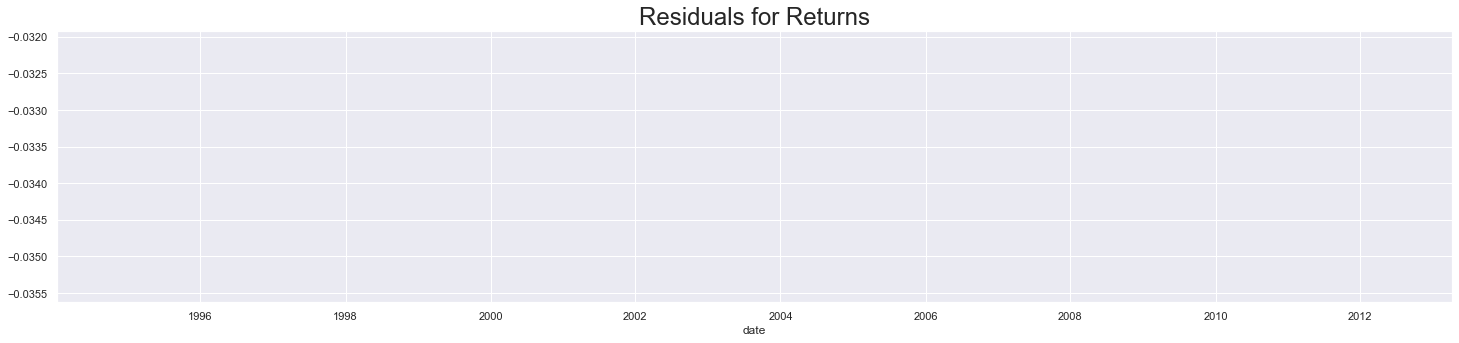

In [97]:
test_data.res_ret_ma_8.plot(figsize=(25,5))
plt.title('Residuals for Returns', size=24)
plt.show()

In [94]:
test_data['res_ret_ma_5'] = results_ma_5.resid[:1]

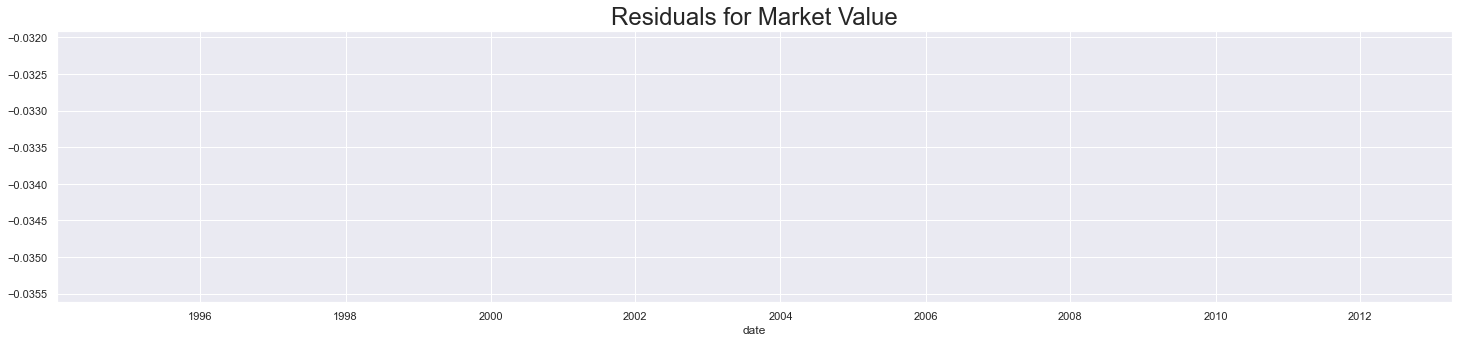

In [96]:
test_data.res_ret_ma_5.plot(figsize=(25,5))
plt.title('Residuals for Market Value', size=24)
plt.show()